## <span style='color:blue '> Projet 7, Implémentez un modèle de scoring </span>

In [1]:
#Librairies à importer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\DELL'

In [3]:
data =  pd.read_csv("application_train.csv")

In [4]:
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_columns', 130)

In [5]:
data.head(4).T

,0,1,2,3
SK_ID_CURR,100002,100003,100004,100006
TARGET,1,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans
CODE_GENDER,M,F,M,F
FLAG_OWN_CAR,N,N,Y,N
FLAG_OWN_REALTY,Y,N,Y,Y
CNT_CHILDREN,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5


In [6]:
def shape(dataframe):
    "Calcule et affiche la forme de dataframe et le taux de remplissage"
    
    # Obtenir le nombre de lignes et de colonnes dans le dataframe
    nb_rows, nb_columns = dataframe.shape
    print("\nLe dataFrame a {} lignes et {} colonnes.".format(nb_rows,nb_columns))
    
    # Obtenir le nombre de données non-Nan dans le dataframe 
    nb_data = dataframe.describe(include='all').loc["count"].sum()

    # calcul du taux de remplissage en arrondissant à 2 décimales 
    import math
    filling_rate = math.floor(nb_data*10000 / (nb_rows * nb_columns))/10000
    print("Le taux de remplissage global du DataFrame est de : {:.2%}".format(filling_rate))
    
    # calcul des valeurs manquantes 
    nb_missing = int((nb_rows * nb_columns) - nb_data)
    print("Il y a {} valeurs manquantes sur {}.".format(nb_missing, int(nb_rows * nb_columns)))

In [7]:
shape(data)


Le dataFrame a 307511 lignes et 122 colonnes.
Le taux de remplissage global du DataFrame est de : 75.60%
Il y a 9152465 valeurs manquantes sur 37516342.


In [8]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### <span style='color:blue '>Types de colonnes </span>

Analyse du type de features, on se penche sur les données catégorielles qui seront à encoder

In [9]:
data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
# Nombre dans chaque type de colonne
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Nombre de classes uniques dans chaque colonne 
data.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques. 
Nous devrons trouver un moyen de traiter ces variables catégorielles (regroupement ?)


#### <span style='color:blue '>Valeurs manquantes </span>

En modélisation, des modèles tels que XGBoost peuvent gérer les valeurs manquantes sans imputation. 
Plusieurs alternatives seront possibles: remplacer les NaN, supprimer les colonnes avec un pourcentage élevé de valeurs manquantes.

In [13]:
100*(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

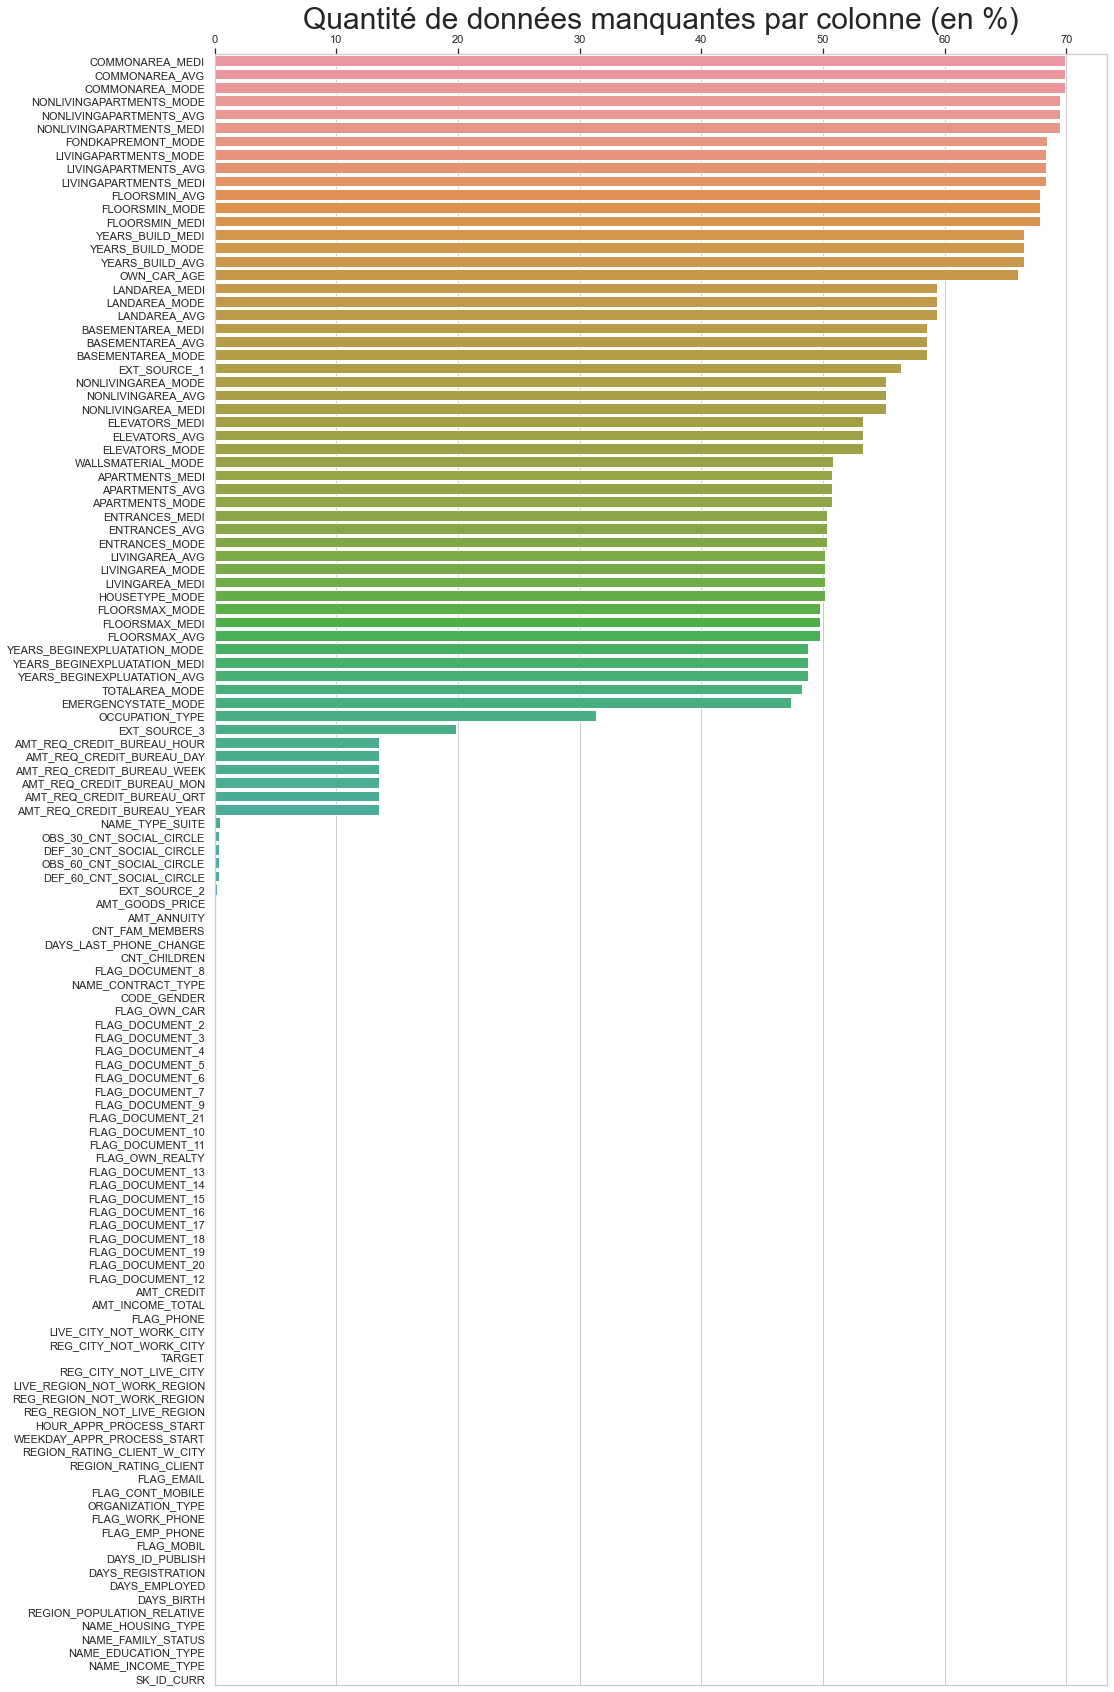

In [14]:
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne (en %)', size=30)
plt.show()

In [15]:
# conda install -c conda-forge/label/gcc7 missingno

<AxesSubplot:>

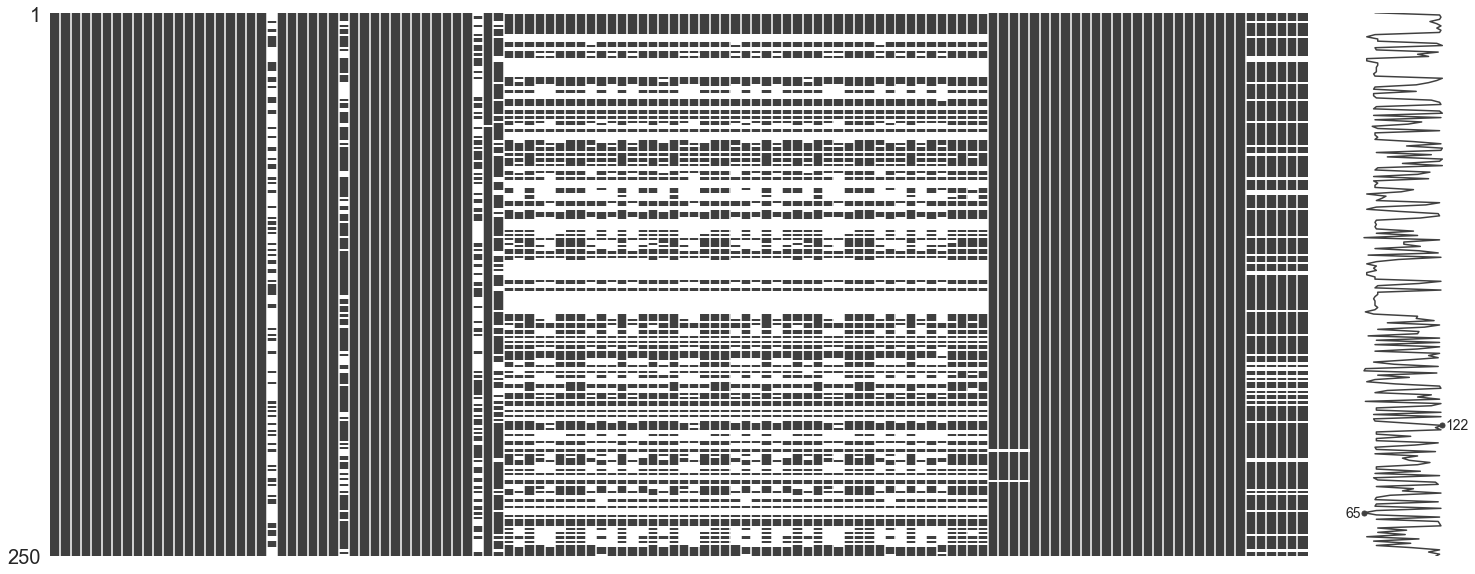

In [16]:
import missingno as msno
%matplotlib inline
msno.matrix(data.sample(250))

<AxesSubplot:>

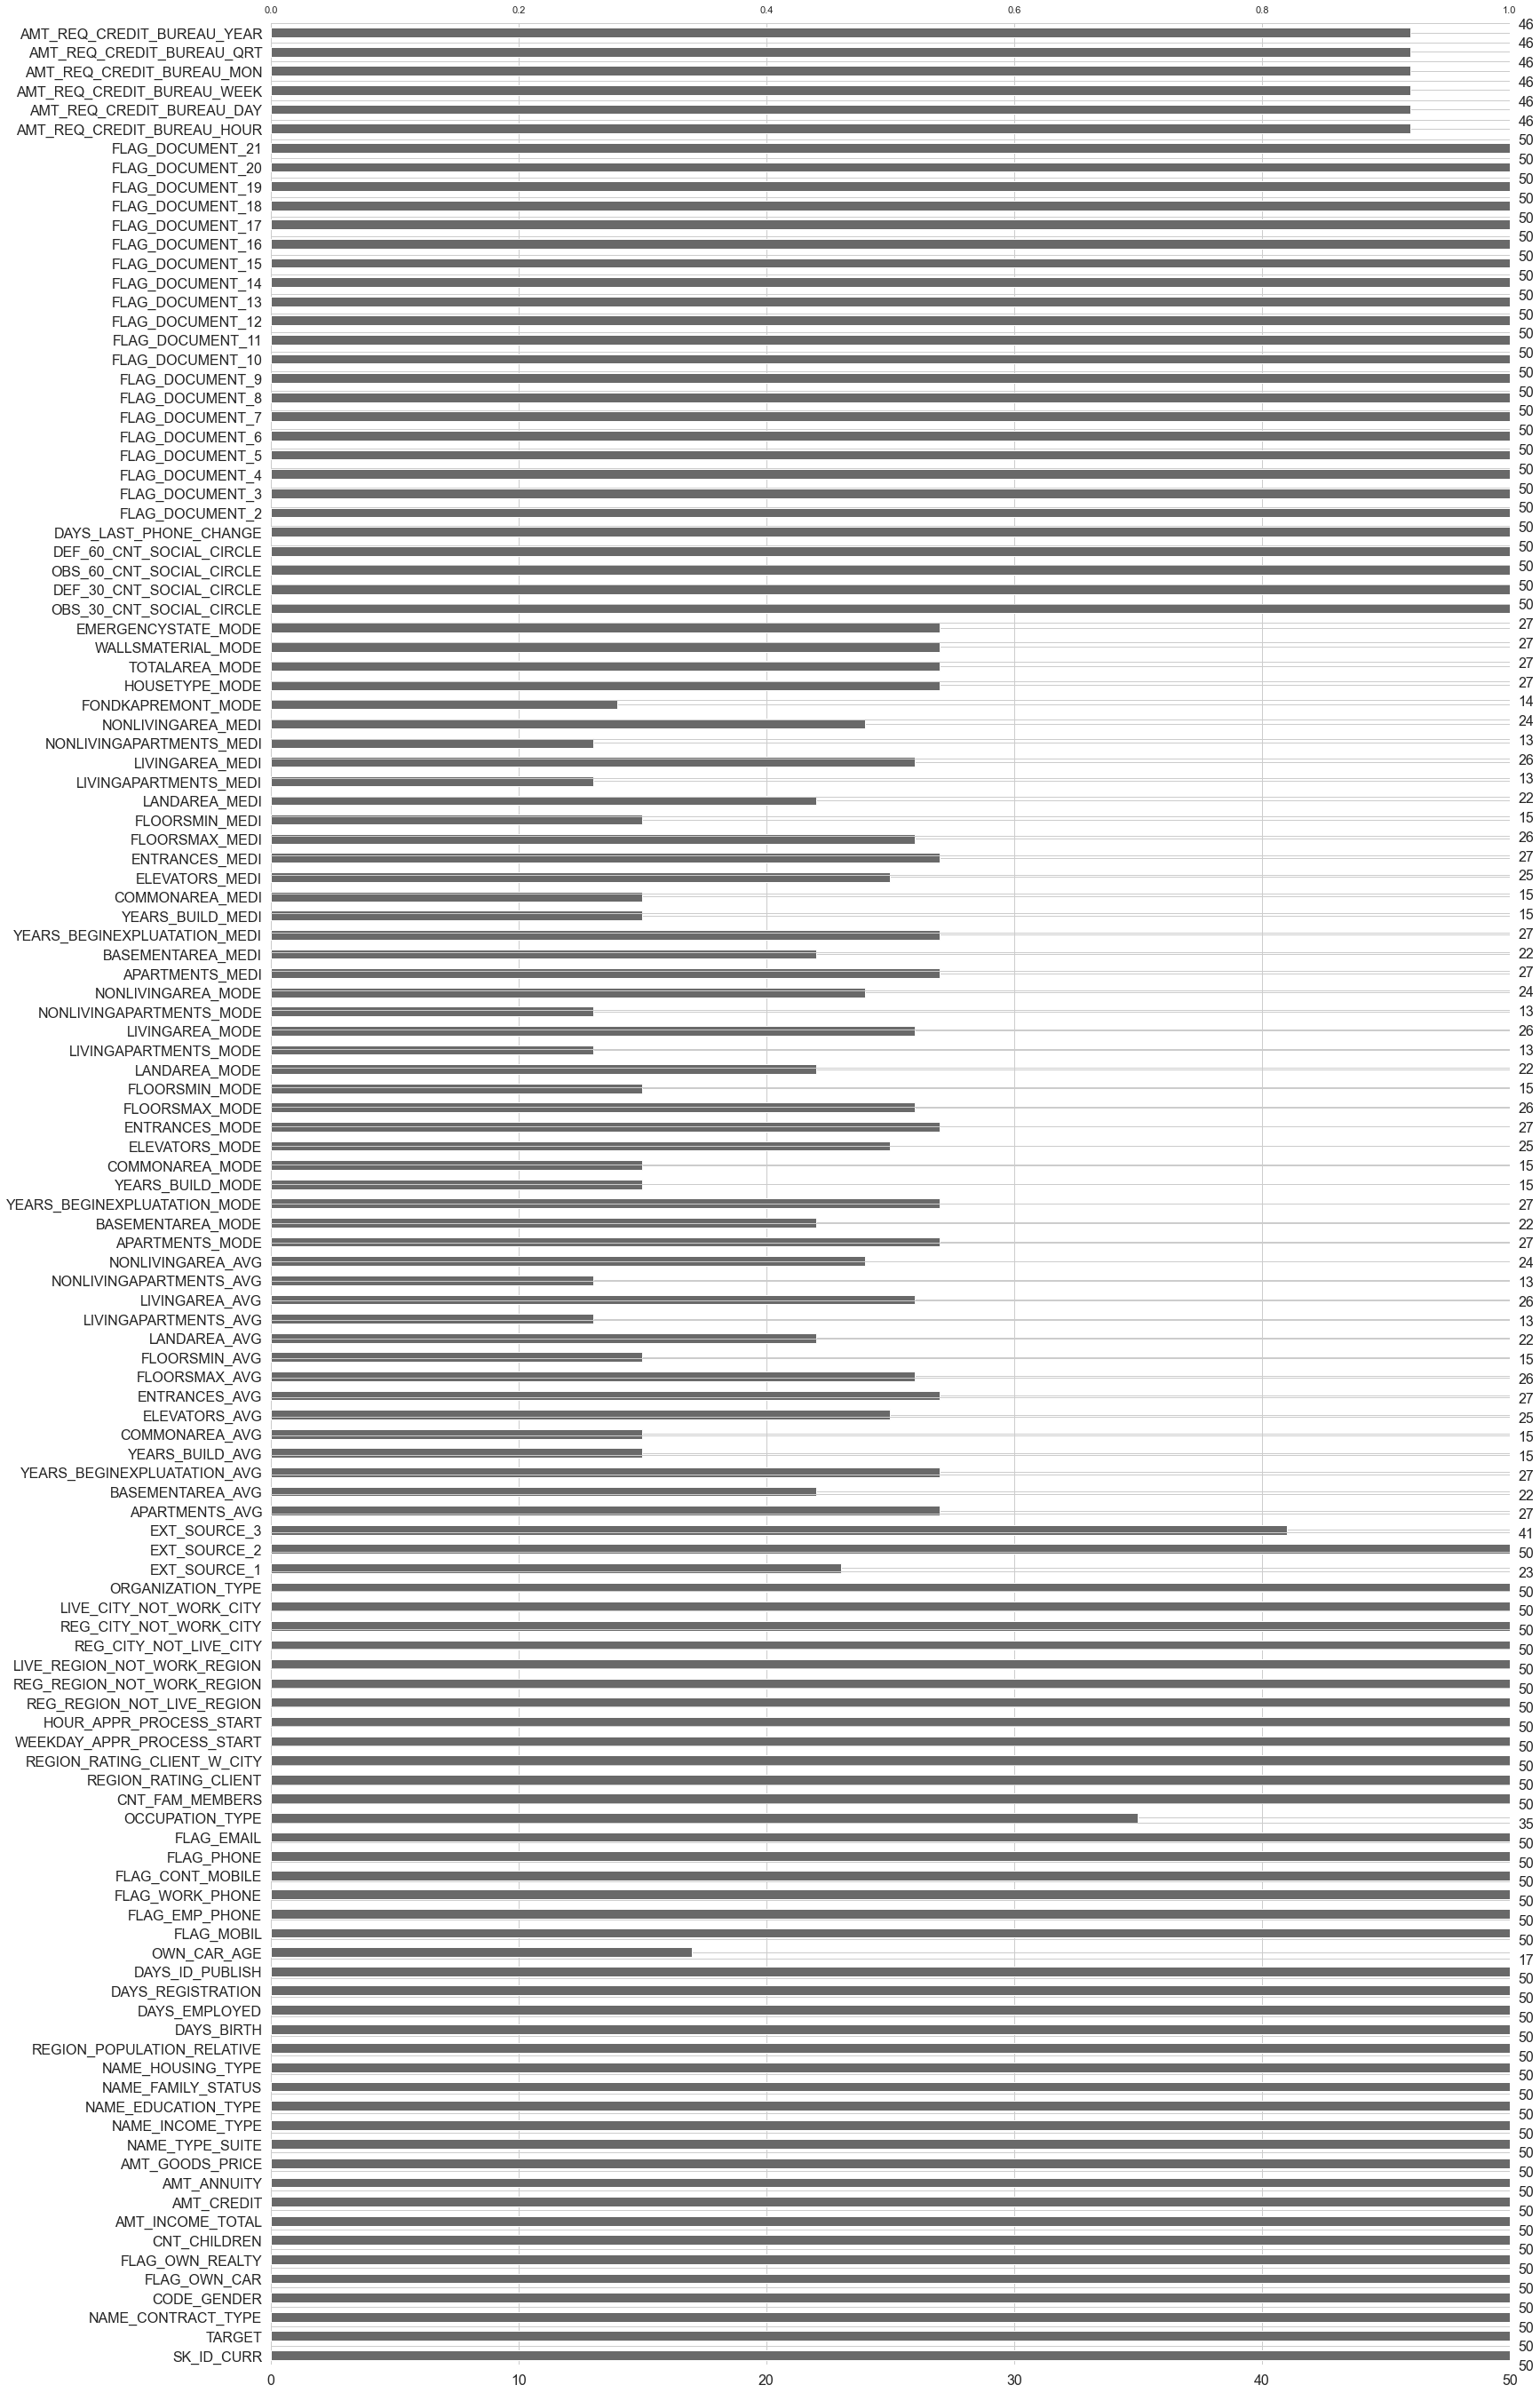

In [17]:
msno.bar(data.sample(50))

<AxesSubplot:>

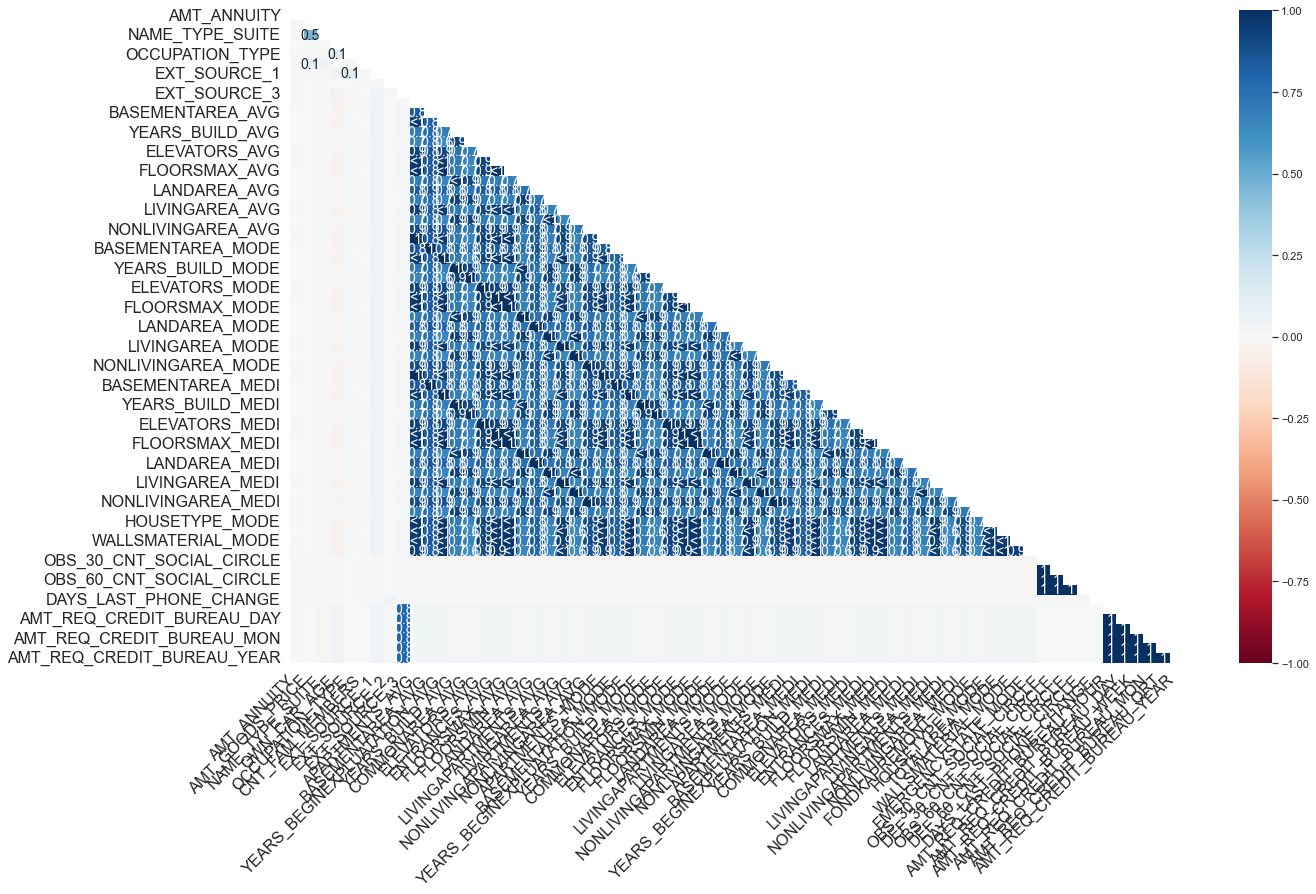

In [18]:
msno.heatmap(data)

<AxesSubplot:>

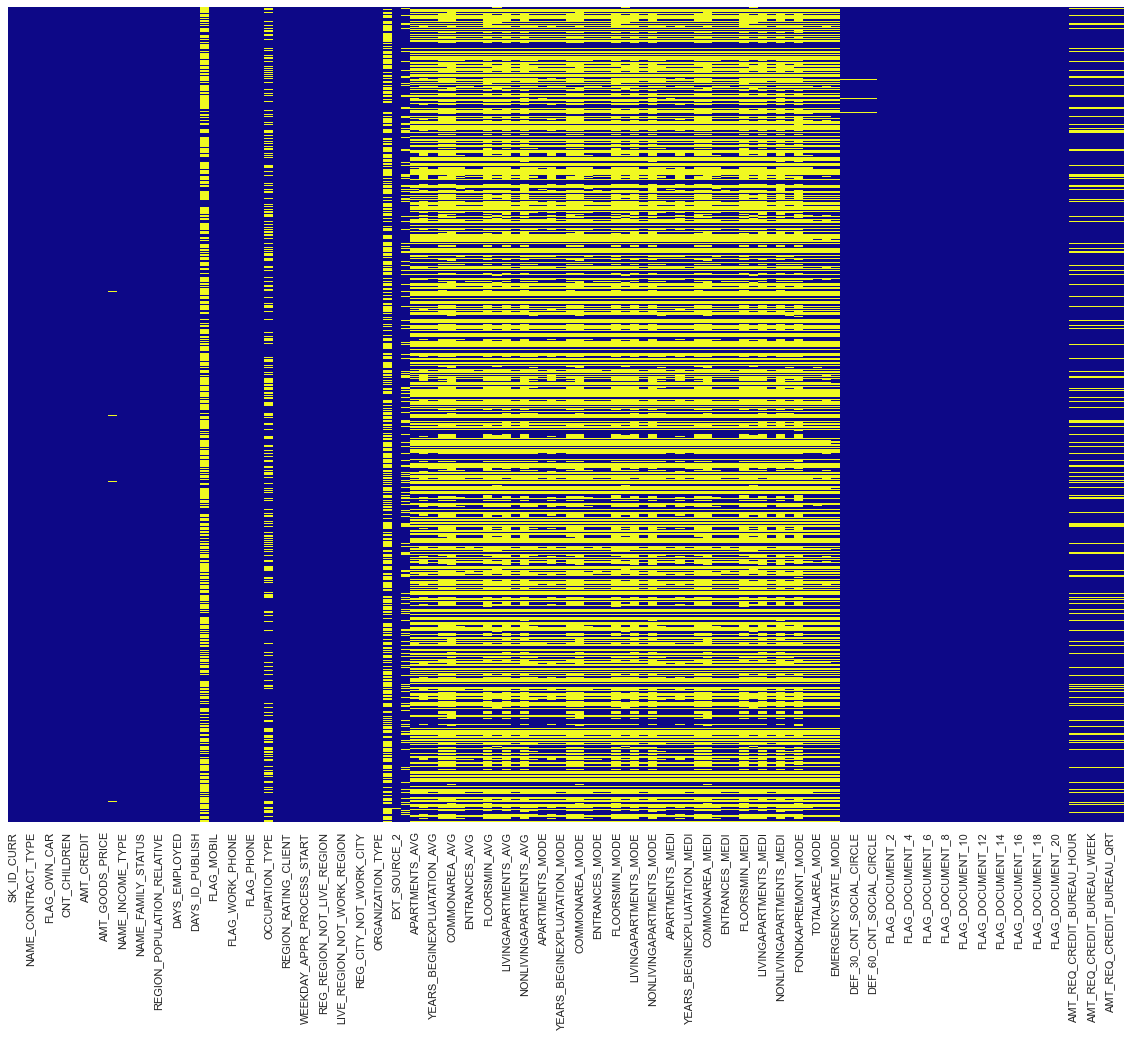

In [19]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='plasma')

Une synthèse des données manquantes un peu confuse du fait du grand nombre de variables, mais il se dégage un premier constat qui montre que les NaN sont plus fortement présentes sur les caractéristiques des habitats (et non sur les crédits), comme l'atteste le TOP 20 ci-après

In [20]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

print('Les 20 premières variables avec plus de valeurs manquantes')
nan_check(data)[:20]

Les 20 premières variables avec plus de valeurs manquantes


,Total,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [21]:
print("Nb of columns in the training sample: " + str(len(nan_check(data))))

print("Nb of columns in the training sample with missing values: " + 
      str(len(nan_check(data)[nan_check(data)['Total']!=0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


#### Suppression des colonnes avec plus de 50 % de données manquantes

In [22]:
column_with_nan =data.columns[data.isnull().any()]

In [23]:
for column in column_with_nan:
    if data[column].isnull().sum()*100.0/data.shape[0] > 50:
        data.drop(column,1, inplace=True)
data.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(column,1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(column,1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(column,1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(column,1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: Fut

C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(column,1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(column,1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(column,1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(column,1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1864\2031097779.py:3: Fut

(307511, 81)

#### <span style='color:blue '>Outliers, valeurs atypiques, anormales </span>
#### Âge du client

In [24]:
#Client's age in days at the time of application (def. from HomeCredit_columns_description.csv)
data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [25]:
data['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

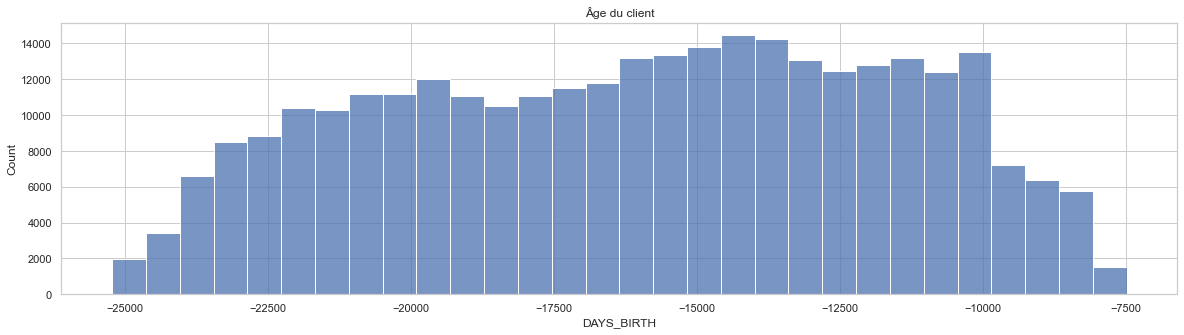

In [26]:
plt.figure(figsize=(20, 5))
sns.histplot(data['DAYS_BIRTH'], bins = 30).set_title('Âge du client')
print()

In [95]:
(data['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

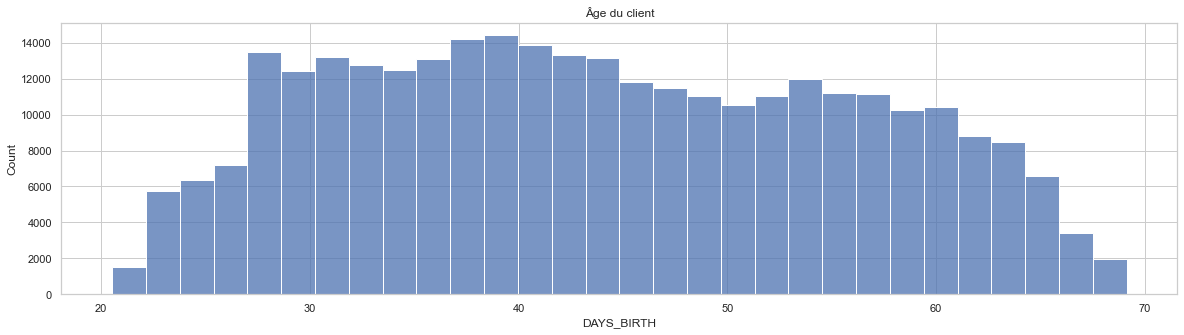

In [96]:
plt.figure(figsize=(20, 5))
sns.histplot((data['DAYS_BIRTH'] / -365), bins = 30).set_title('Âge du client')
print()

#### DAYS_EMPLOYED

Nombre des jours travaillés

In [97]:
#How many days before the application the perso... (def. from HomeCredit_columns_description.csv)
data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

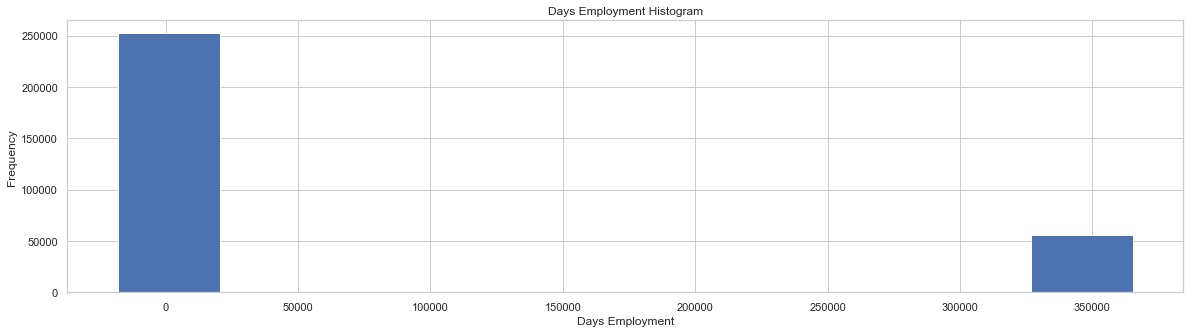

In [98]:
data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', figsize=(20,5));
plt.xlabel('Days Employment')
print()

Idem ces données ne sont pas "normales" au sens où le Max. représente 1000 années (365243/365j). Est-ce un individu isolé? Plusieurs individus de l'échantillon?

In [99]:
print("%0.0f values with 365243 days employed for training data" % 
      len(data[data['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for training data" % data.shape[0])
print("***********************")

55374 values with 365243 days employed for training data
307511 Total values from days employed for training data
***********************


Comme solution, nous allons remplir les valeurs anormale, avec nan, (sans un nombre)

In [100]:
#Create an outliers flag column
data['DAYS_EMPLOYED_OUTLIERS'] = data["DAYS_EMPLOYED"] == 365243

#Replace outliers values with nan
data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

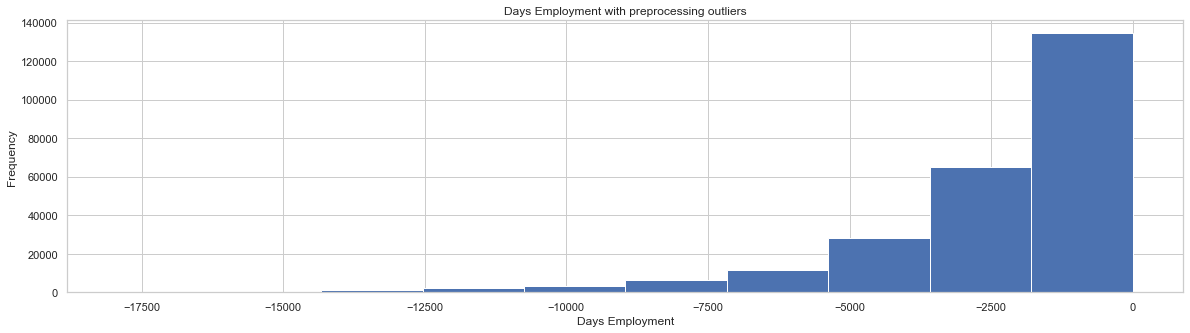

In [101]:
data['DAYS_EMPLOYED'].plot.hist(title ='Days Employment with preprocessing outliers', figsize=(20,5))
plt.xlabel('Days Employment')
print()

La distribution semble être plus conforme à nos attentes.  Nous avons également créé une nouvelle colonne pour indiquer au modèle que ces valeurs étaient à l'origine anormales (car nous devrons remplir les nans avec une certaine valeur, probablement la médiane de la colonne). 

#### <span style='color:blue '>Analyse des principales variables… </span>


Il est important de se focaliser sur les principales features pouvant être explicatives. Ici l'idée n'est pas de tout analyser en univarié ou multivarié, mais simplement d'avoir une image des points métiers qui aident à orienter nos décisions dans la "prise de risque" à l'attribution d'un crédit.

In [102]:
#Fonctions pour faciliter l'analyse des principales variables…
def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    print()

In [103]:
def plot_percent_target1(data, feature, title) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    print()

Loan types - Distribution du type de prêts contractés + comparatif avec le pourcentage des prêts avec la valeur TARGET 1(prêt non retourné).


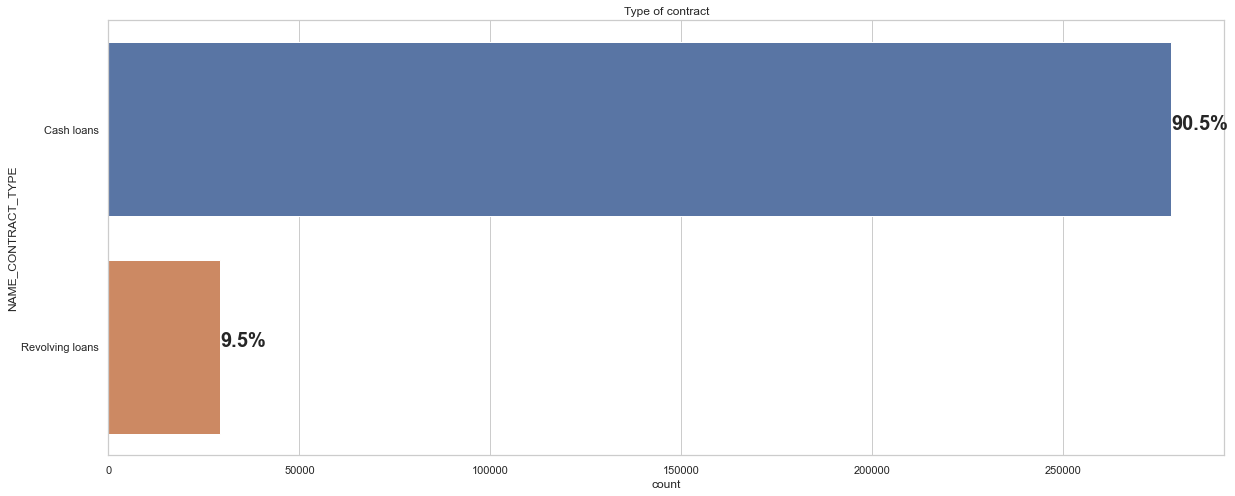

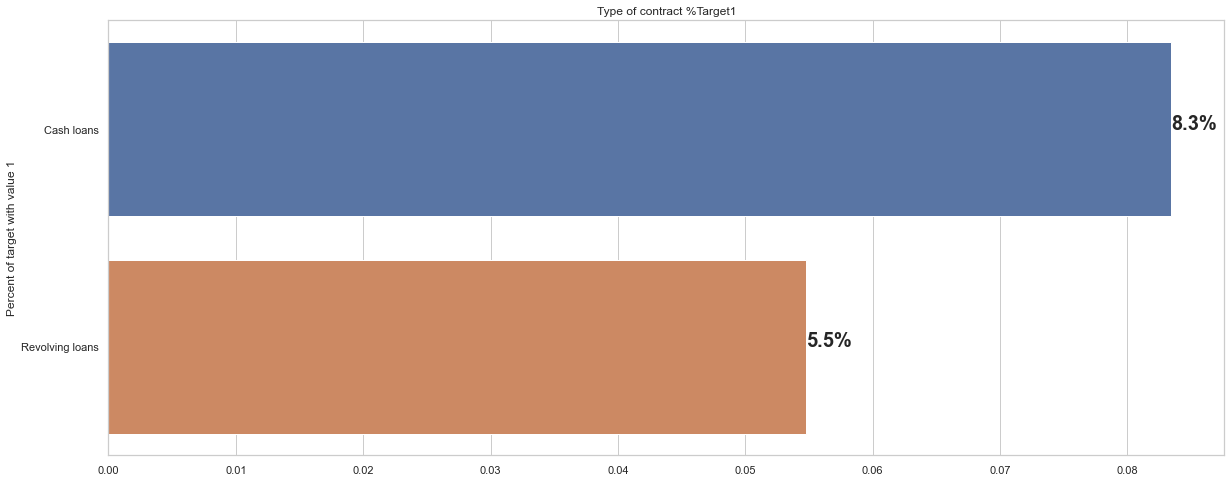

In [104]:
#NAME_CONTRACT_TYPE
plot_stat(data, 'NAME_CONTRACT_TYPE',"Type of contract")
print("")
plot_percent_target1(data, 'NAME_CONTRACT_TYPE',"Type of contract %Target1")

Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts; dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

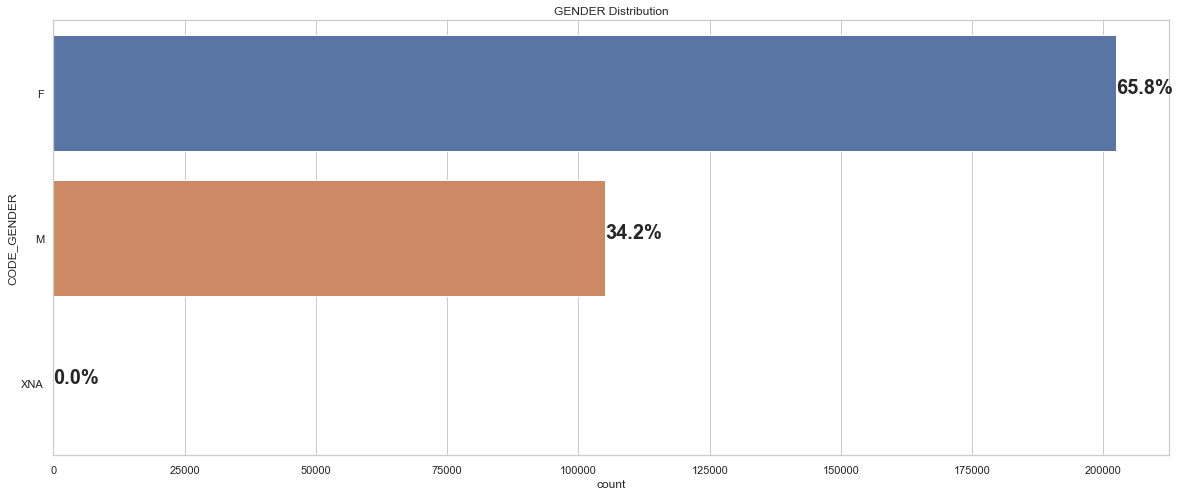

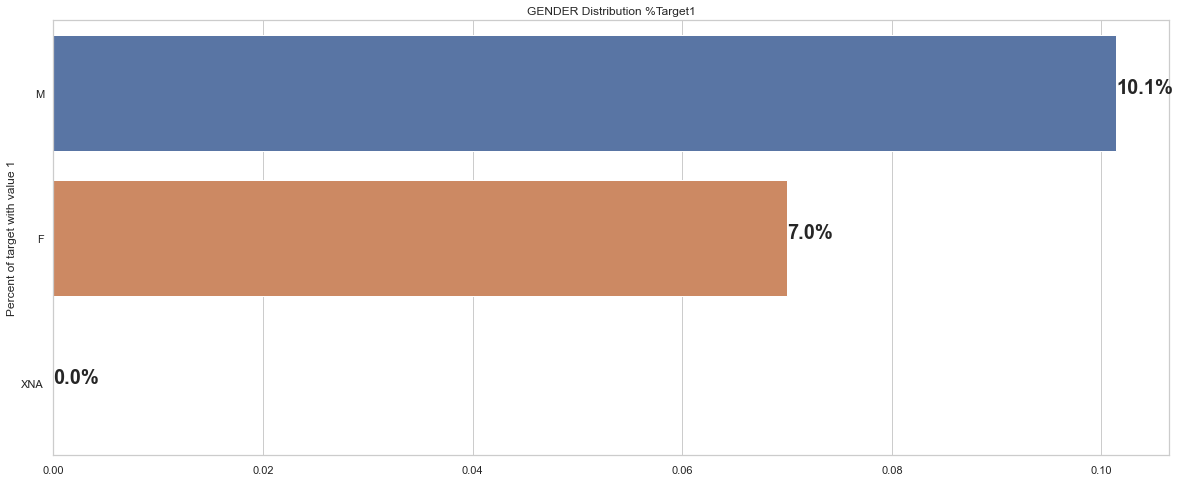

In [105]:
#CODE_GENDER
plot_stat(data, 'CODE_GENDER',"GENDER Distribution")
print("")
plot_percent_target1(data, 'CODE_GENDER',"GENDER Distribution %Target1")

Client gender - Distribution H/F clients, mais aussi le pourcentage des prêts (par sexe du client) avec la valeur TARGET 1 (prêt non retourné).

Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

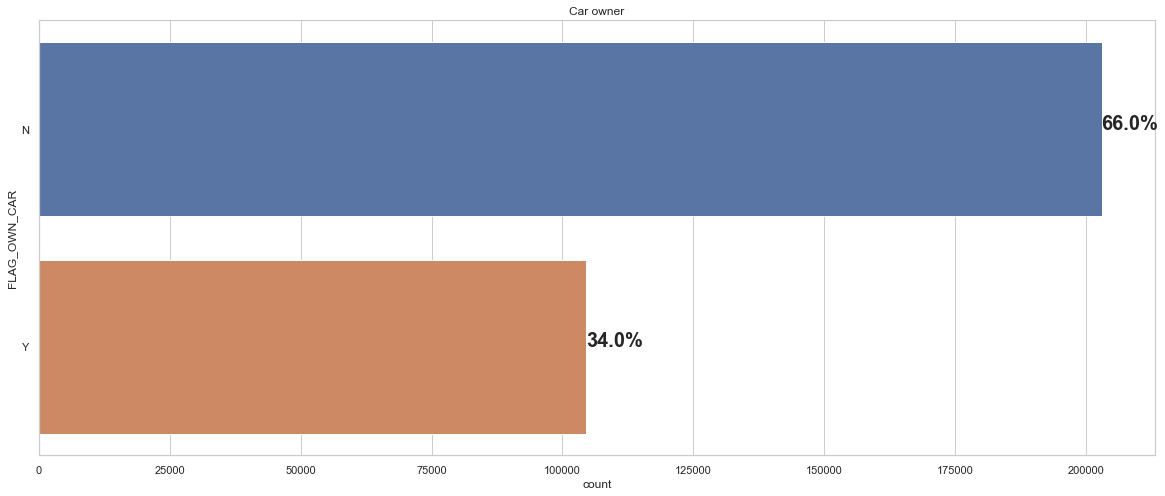

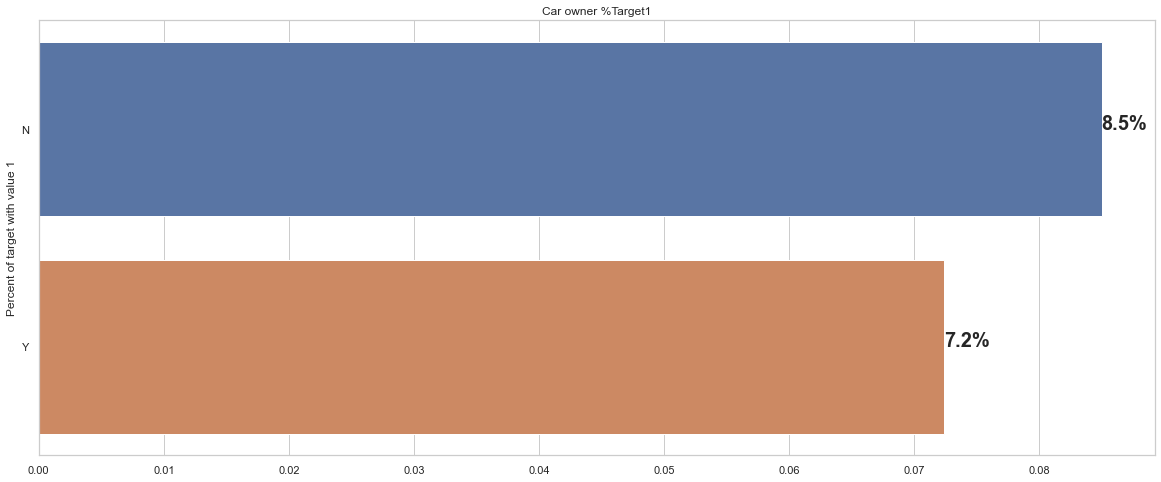

In [106]:
#FLAG_OWN_CAR
plot_stat(data, 'FLAG_OWN_CAR',"Car owner")
print("")
plot_percent_target1(data, 'FLAG_OWN_CAR',"Car owner %Target1")

Flag own car - Distribution d'un impact possible entre les clients propriétaire d'un véhicule et ceux qui ne le sont pas…


Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

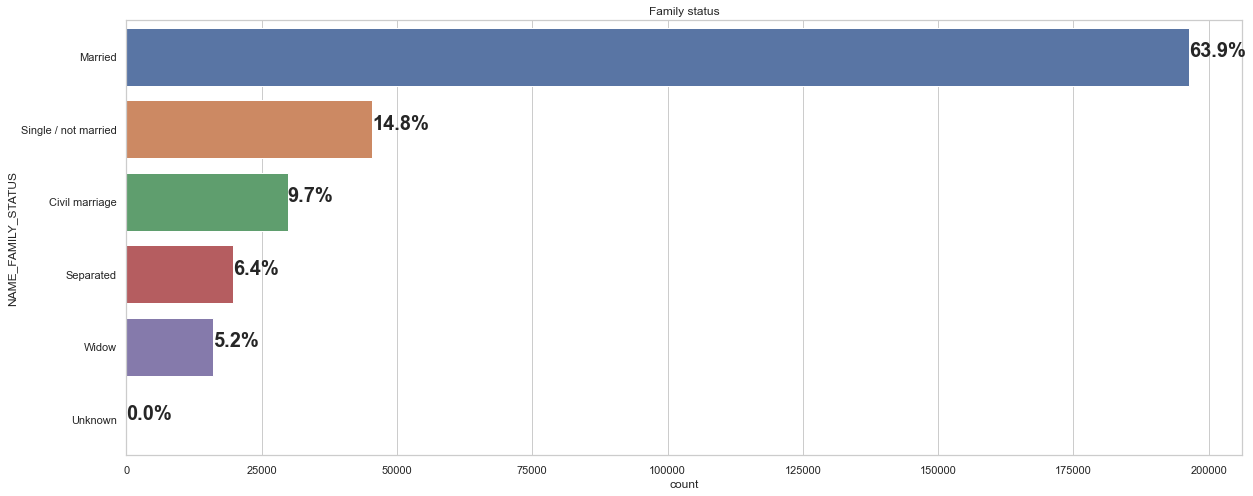

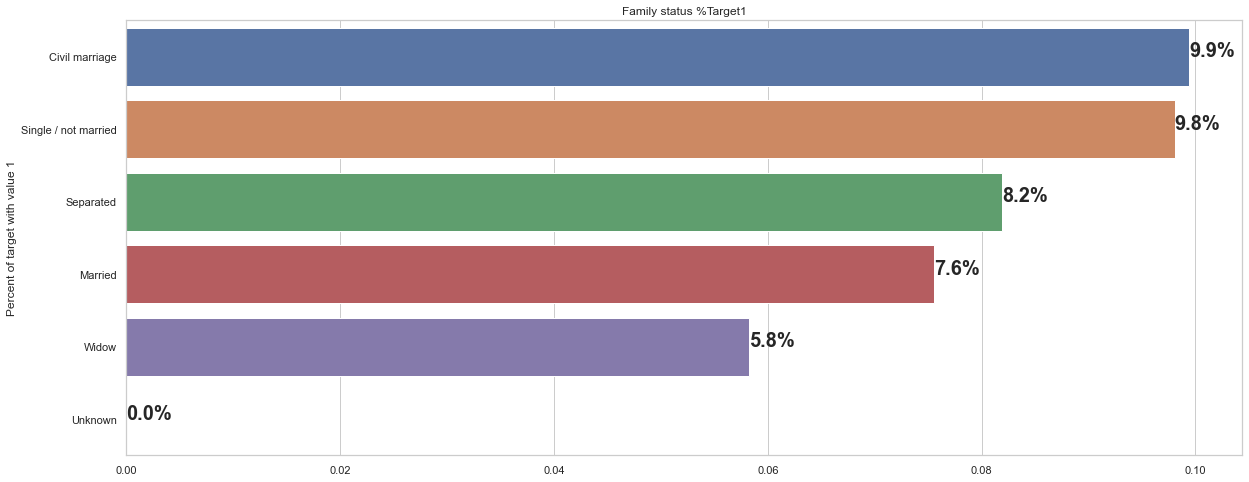

In [107]:
#NAME_FAMILY_STATUS
plot_stat(data, 'NAME_FAMILY_STATUS',"Family status")
print("")
plot_percent_target1(data, 'NAME_FAMILY_STATUS',"Family status %Target1")

La plupart des clients sont mariés, suivis des célibataires / non mariés et des mariages civils.

En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

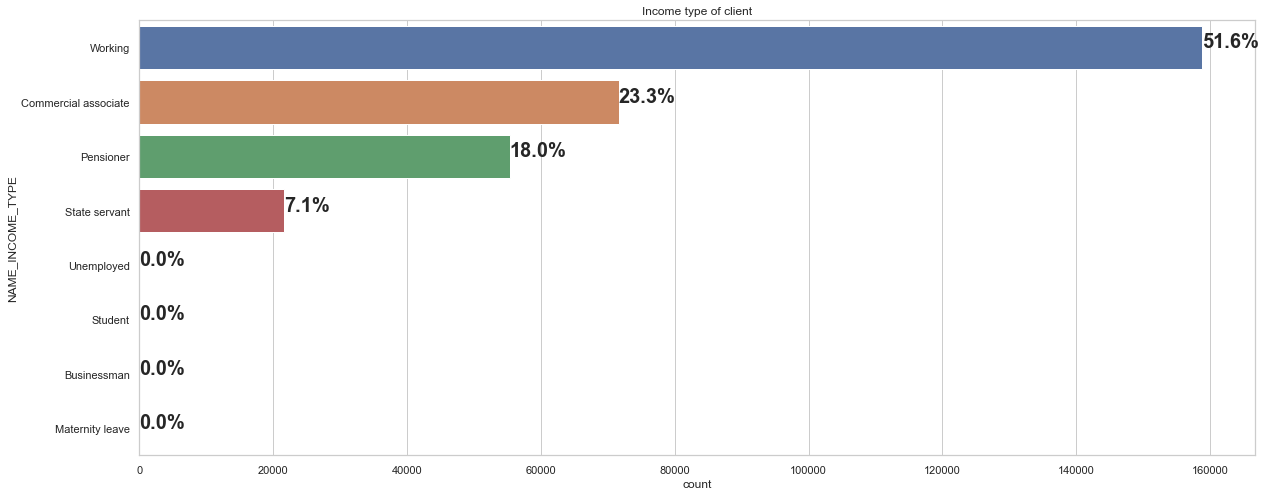

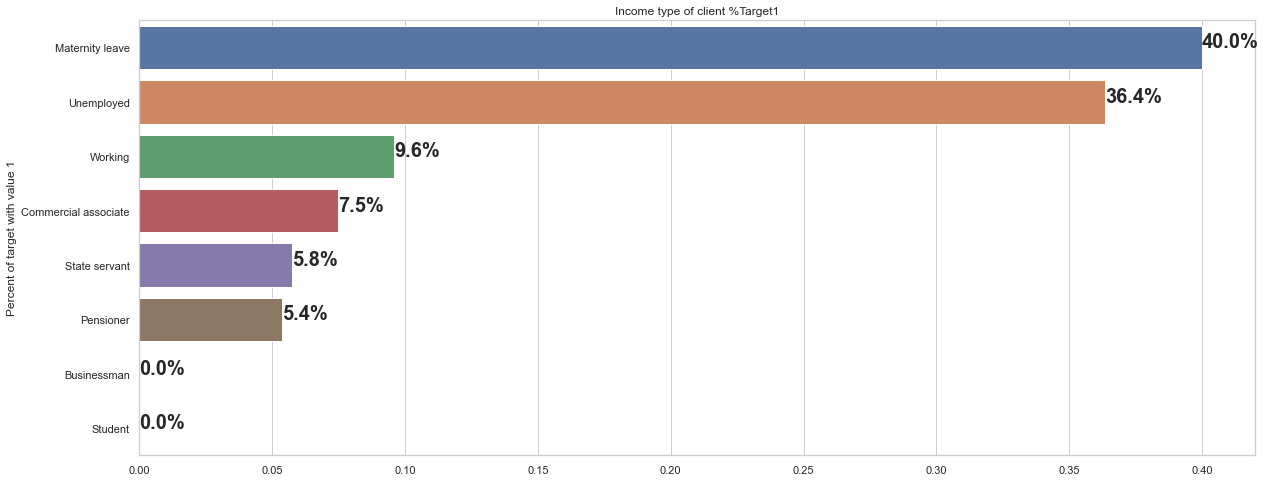

In [108]:
#NAME_INCOME_TYPE
plot_stat(data, 'NAME_INCOME_TYPE',"Income type of client")
print("")
plot_percent_target1(data, 'NAME_INCOME_TYPE',"Income type of client %Target1")

La plupart des demandeurs de prêts sont des revenus du travail, suivis par un associé commercial, un retraité et un fonctionnaire.

Les demandeurs avec le type de revenu Congé de maternité ont un ratio de près de 40% de prêts non remboursés, suivis des chômeurs (37%). Les autres types de revenus sont inférieurs à la moyenne de 10% pour ne pas rembourser les prêts.


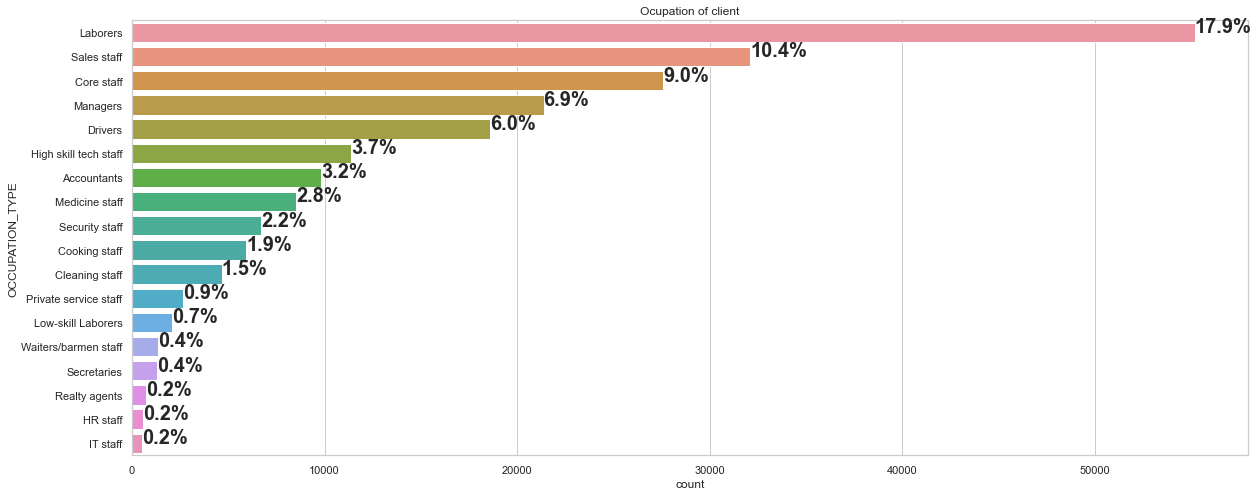

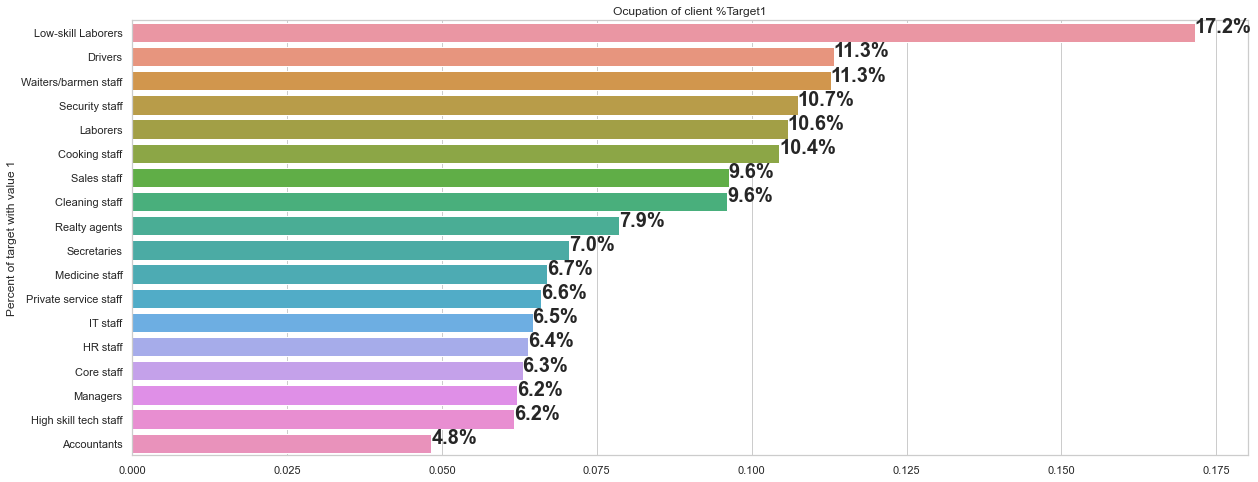

In [109]:
#OCCUPATION_TYPE
plot_stat(data, 'OCCUPATION_TYPE',"Ocupation of client")
print("")
plot_percent_target1(data, 'OCCUPATION_TYPE',"Ocupation of client %Target1")

La plupart des prêts sont contractés par des ouvriers, suivis par les vendeurs/commerciaux. Le personnel informatique prend le montant de prêts le plus bas.

La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

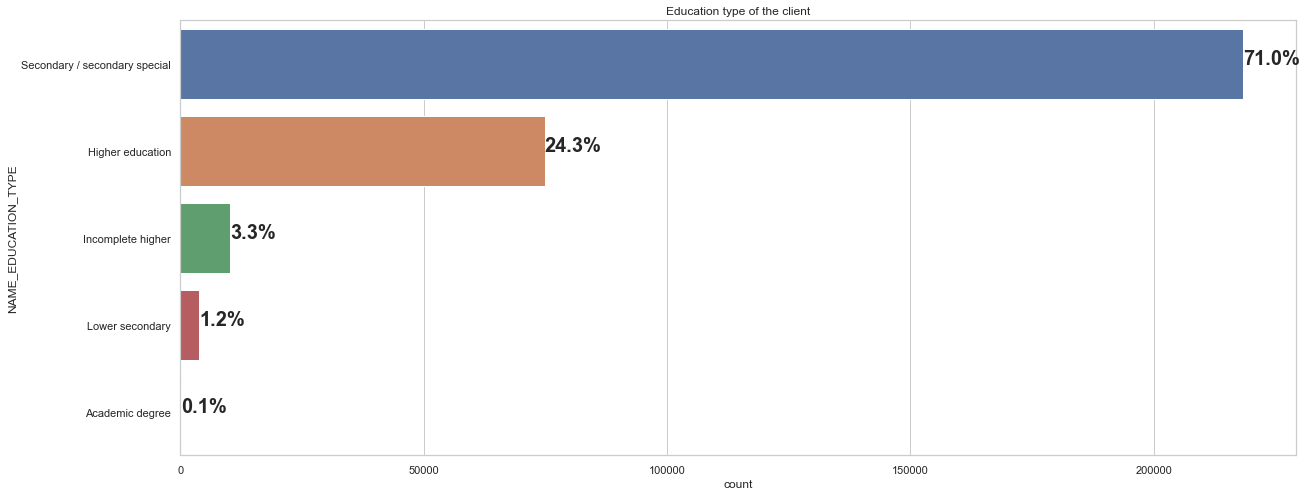

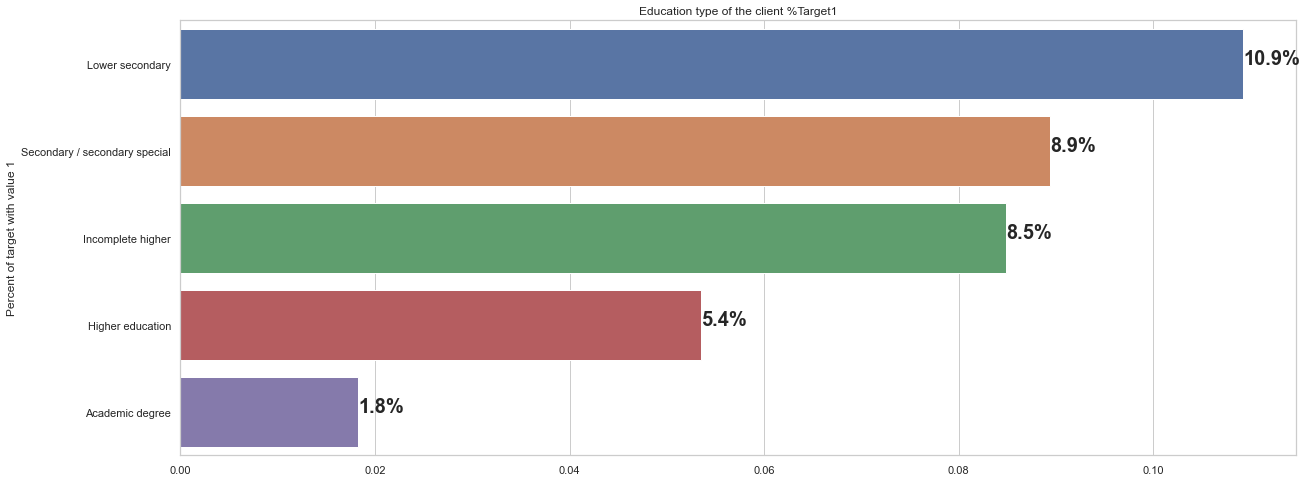

In [110]:
#NAME_EDUCATION_TYPE
plot_stat(data, 'NAME_EDUCATION_TYPE',"Education type of the client")
print("")
plot_percent_target1(data, 'NAME_EDUCATION_TYPE',"Education type of the client %Target1")

La majorité des clients ont une éducation dans l'éducation secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

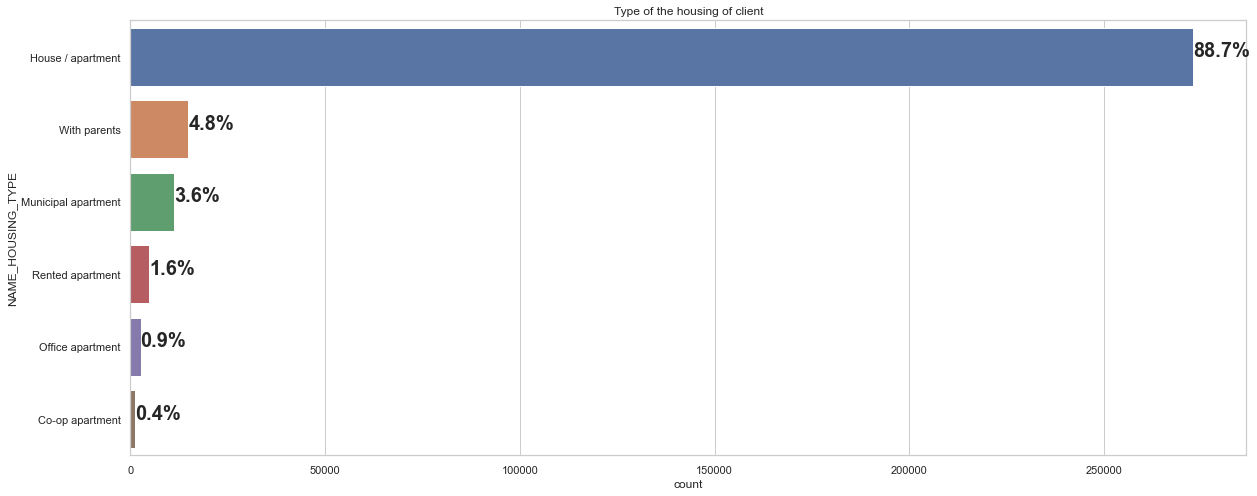

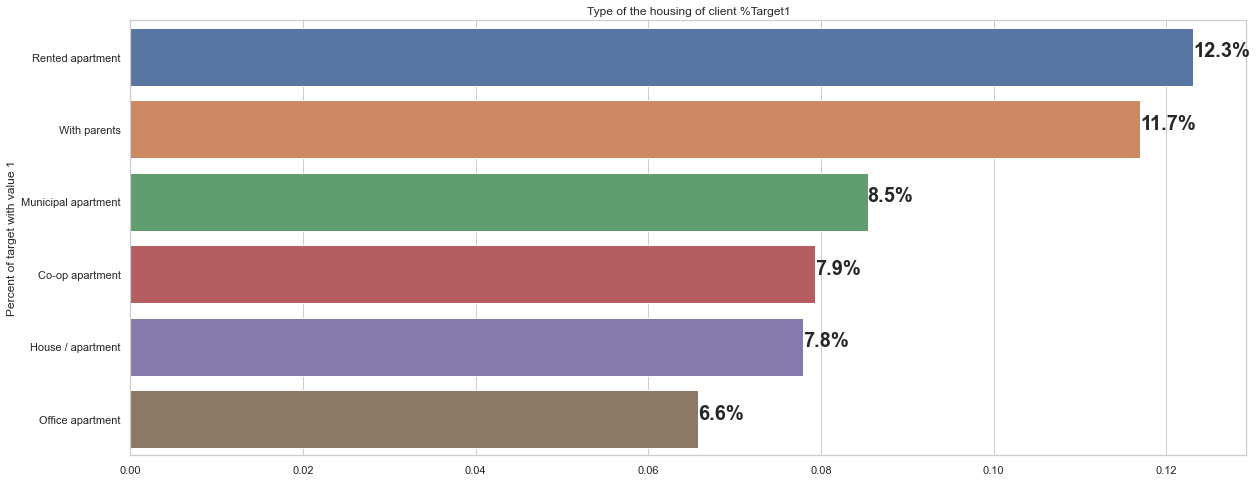

In [111]:
#NAME_HOUSING_TYPE
plot_stat(data, 'NAME_HOUSING_TYPE',"Type of the housing of client")
print("")
plot_percent_target1(data, 'NAME_HOUSING_TYPE',"Type of the housing of client %Target1")

Plus de 250 000 demandeurs de crédits vivent en maison ou appartement. Les catégories suivantes, faible pourcentage, représentent une population moins "indépendante" (vivre chez ses parents, etc…).

Dans ces catégories, les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.


#### Corrélations

L'analyse peut continuer par une étape de traitement des corrélations entre les caractéristiques et la Target. L'idée est de calculer le coefficient de corrélation de Pearson entre chaque variable et la Target. Cette étape permet d'avoir un aperçu des relations possibles entre les variables.

In [112]:
#Display correlations
print('Most Positive Correlations:\n', data.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', data.corr()['TARGET'].sort_values().head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------
Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
DAYS_EMPLOYED_OUTLIERS       -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULA

Notons que la corrélation la plus forte est celle de la variable 'DAYS_BIRTH'. Ceci étant, pour faciliter la compréhension est retrouver la logique vue en préambule, les jours exprimés en valeurs négatives peuvent être traités en valeurs absolues. Alors le coef. de Person sera négatif, cela expose le fait qu'un client plus âgé sera moins susceptible de faire défaut au remboursement de son crédit (cela peut sembler logique, en tout cas ce n'est pas absurde).

In [113]:
#Find the correlation of the positive days since birth and target
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
data['DAYS_BIRTH'].corr(data['TARGET'])

-0.07823930830982692

En termes de distribution des âges elle peut uniquement servir à visualiser la non présence d'outliers, suite à ce qui a été fait en amont sur les valeurs négatives de départ. Pour visualiser l'effet de l'âge sur la Target, nous pouvons faire un graphique (KDE) coloré par la valeur TARGET 0 et 1.

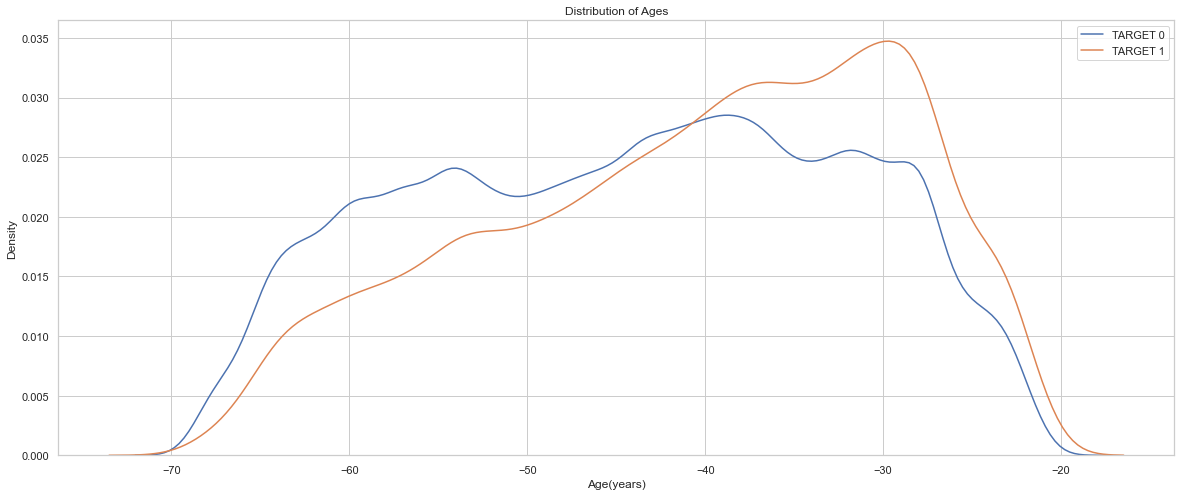

In [114]:
plt.figure(figsize = (20, 8))
sns.kdeplot(data[data['TARGET'] == 0]['DAYS_BIRTH'] / -365, label = 'TARGET 0')
sns.kdeplot(data[data['TARGET'] == 1]['DAYS_BIRTH'] / -365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
print()

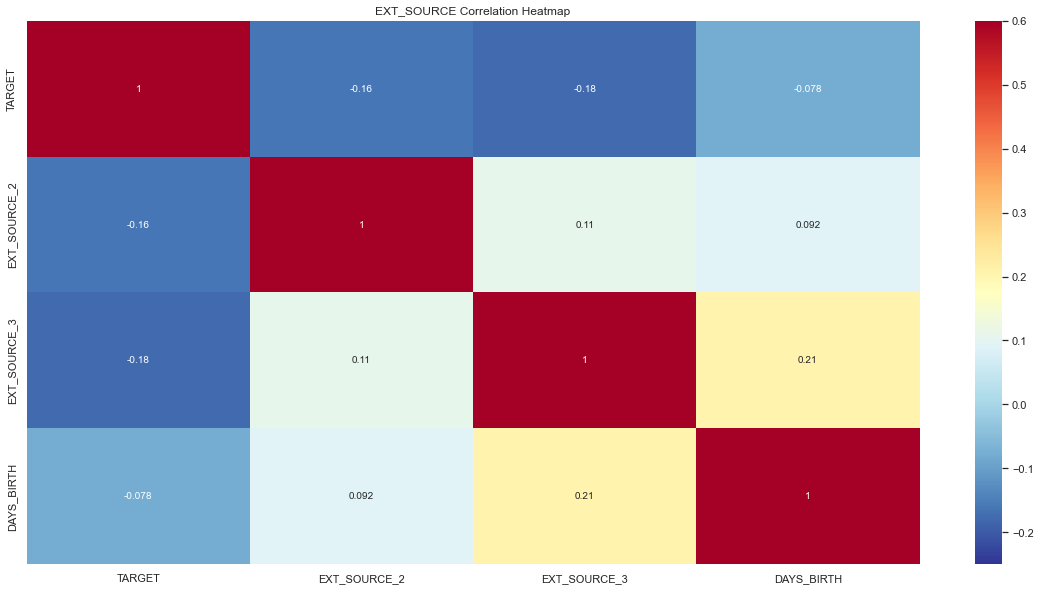

In [115]:
#Heatmap of correlations
plt.figure(figsize = (20,10))
sns.heatmap(data[['TARGET','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
print()

In [116]:
#Plot distribution of one feature
def plot_distribution(feature, title):
    plt.figure(figsize=(20,6))

    t0 = data.loc[data['TARGET'] == 0]
    t1 = data.loc[data['TARGET'] == 1]

    
    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    print()   

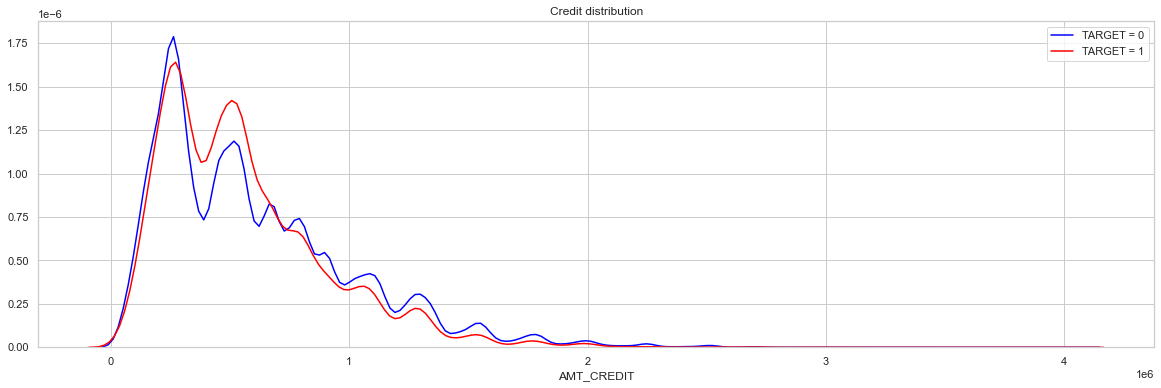

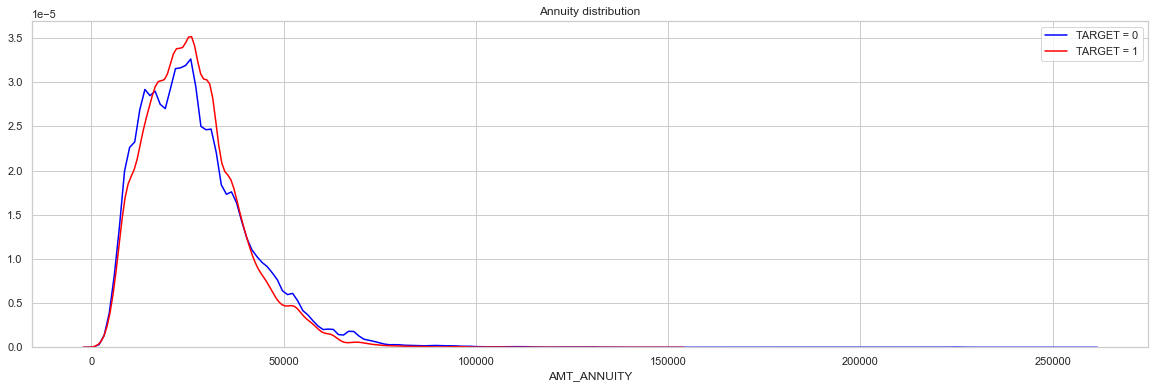

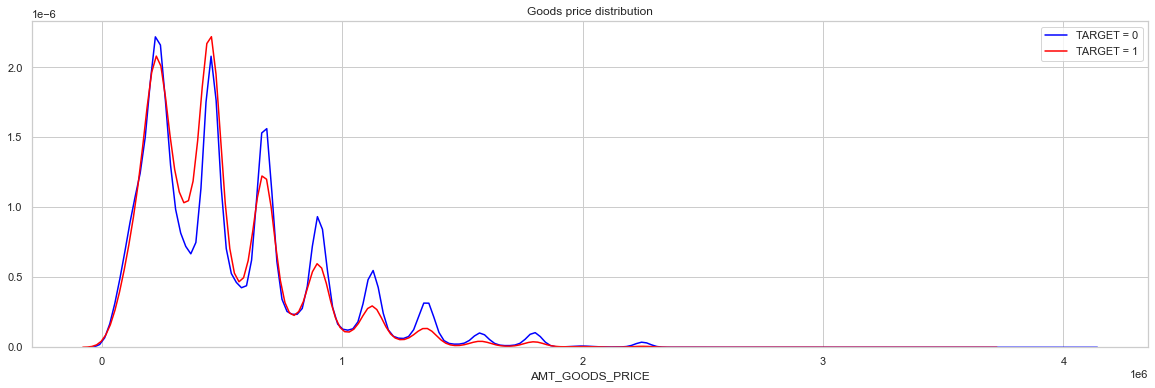

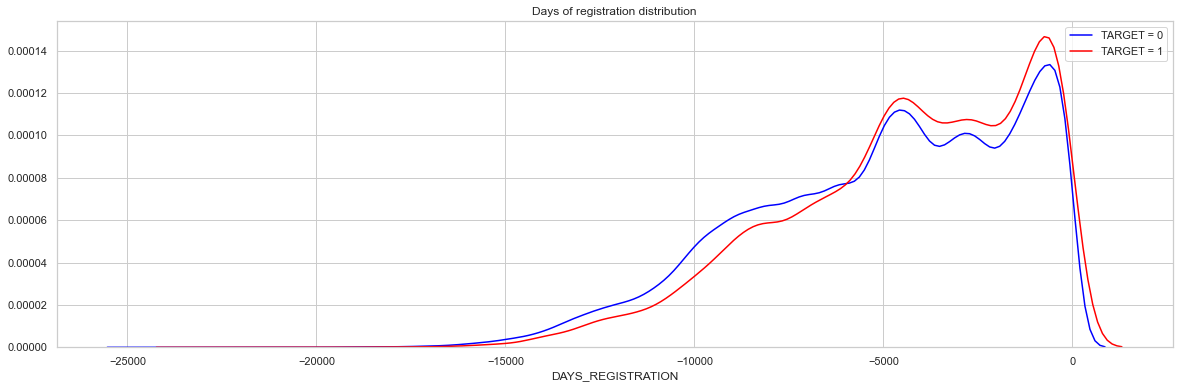

In [117]:
plot_distribution('AMT_CREDIT', "Credit distribution")
print("")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("")
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("")
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")
print("")

In [118]:
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

In [123]:
data.shape

(307511, 87)

In [122]:
#Display correlations with features engineering
print('Most Positive Correlations:\n', data.corr()['TARGET'].sort_values().tail(20))
print("--------------------------")
print('Most Negative Correlations:\n', data.corr()['TARGET'].sort_values().head(20))

Most Positive Correlations:
 CREDIT_TERM                    0.012704
ANNUITY_INCOME_PERCENT         0.014265
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED_PERCENT          0.067955
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------
Most Negative Correlations:
 EXT_SOURCE_3                   -0.178919
EXT_SOURCE_2                   -0.160472
AGE 

In [124]:
data['AGE'] = (data['DAYS_BIRTH']/365)

In [125]:
list_to_keep = [
    'TARGET',
    'SK_ID_CURR',
    'CODE_GENDER',
    'AGE',
    'DAYS_EMPLOYED_PERCENT',
    'REGION_RATING_CLIENT_W_CITY',
     'REGION_RATING_CLIENT',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY',
    'FLAG_EMP_PHONE',
    'REG_CITY_NOT_LIVE_CITY',
    'FLAG_DOCUMENT_3',
    'DAYS_REGISTRATION',
    'LIVE_CITY_NOT_WORK_CITY',
     'DEF_60_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'FLAG_WORK_PHONE',
    'AMT_REQ_CREDIT_BUREAU_YEAR',    
    'ANNUITY_INCOME_PERCENT',
    'CNT_CHILDREN',
     'EXT_SOURCE_3',
    'EXT_SOURCE_2', 
    'FLOORSMAX_AVG',
     'FLOORSMAX_MEDI',
    'FLOORSMAX_MODE',
     'AMT_GOODS_PRICE',
      'REGION_POPULATION_RELATIVE',
    'TOTALAREA_MODE',
   'AMT_CREDIT',
     'FLAG_DOCUMENT_6',    
    'HOUR_APPR_PROCESS_START',
     'FLAG_PHONE',
    'AMT_ANNUITY',
      'AMT_REQ_CREDIT_BUREAU_MON',    
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_13'   
    ]

In [126]:
data = data[list_to_keep]

In [139]:
# Remplissage par colonne du jeu de données
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [140]:
missing_values = missing_values_table(data)
missing_values.head

Your selected dataframe has 37 columns.
There are 15 columns that have missing values.


<bound method NDFrame.head of                             Missing Values  % of Total Values
FLOORSMAX_AVG                       153020               49.8
FLOORSMAX_MEDI                      153020               49.8
FLOORSMAX_MODE                      153020               49.8
TOTALAREA_MODE                      148431               48.3
EXT_SOURCE_3                         60965               19.8
DAYS_EMPLOYED_PERCENT                55374               18.0
AMT_REQ_CREDIT_BUREAU_YEAR           41519               13.5
AMT_REQ_CREDIT_BUREAU_MON            41519               13.5
DEF_60_CNT_SOCIAL_CIRCLE              1021                0.3
DEF_30_CNT_SOCIAL_CIRCLE              1021                0.3
EXT_SOURCE_2                           660                0.2
AMT_GOODS_PRICE                        278                0.1
ANNUITY_INCOME_PERCENT                  12                0.0
AMT_ANNUITY                             12                0.0
DAYS_LAST_PHONE_CHANGE                  

In [141]:
data.fillna(data.median().round(1), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21928\1829651594.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median().round(1), inplace=True)


In [142]:
missing_values = missing_values_table(data)
missing_values.head

Your selected dataframe has 37 columns.
There are 0 columns that have missing values.


<bound method NDFrame.head of Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []>

In [157]:
data =  pd.read_csv("df_cleaned_no_stand_enc.csv")

In [158]:
data['AGE'] = data['AGE'].astype(int)

In [159]:
data

,TARGET,SK_ID_CURR,CODE_GENDER,AGE,DAYS_EMPLOYED_PERCENT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,ANNUITY_INCOME_PERCENT,CNT_CHILDREN,EXT_SOURCE_3,EXT_SOURCE_2,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,AMT_CREDIT,FLAG_DOCUMENT_6,HOUR_APPR_PROCESS_START,FLAG_PHONE,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_16,FLAG_DOCUMENT_13
0,1,100002,M,25,-0.067329,2,2,-1134.0,-2120,0,1,0,1,-3648.0,0,2.0,2.0,0,1.0,0.121978,0,0.139376,0.262949,0.0833,0.0833,0.0833,351000.0,0.018801,0.0149,406597.5,0,10,1,24700.5,0.0,0,0
1,0,100003,F,45,-0.070862,1,1,-828.0,-291,0,1,0,1,-1186.0,0,0.0,0.0,0,0.0,0.132217,0,0.500000,0.622246,0.2917,0.2917,0.2917,1129500.0,0.003541,0.0714,1293502.5,0,11,1,35698.5,0.0,0,0
2,0,100004,M,52,-0.011814,2,2,-815.0,-2531,0,1,0,0,-4260.0,0,0.0,0.0,1,0.0,0.100000,0,0.729567,0.555912,0.2000,0.2000,0.2000,135000.0,0.010032,0.1000,135000.0,0,9,1,6750.0,0.0,0,0
3,0,100006,F,52,-0.159905,2,2,-617.0,-2437,0,1,0,1,-9833.0,0,0.0,0.0,0,1.0,0.219900,0,0.500000,0.650442,0.2000,0.2000,0.2000,297000.0,0.008019,0.1000,312682.5,0,17,0,29686.5,0.0,0,0
4,0,100007,M,54,-0.152418,2,2,-1106.0,-3458,1,1,0,0,-4311.0,1,0.0,0.0,0,0.0,0.179963,0,0.500000,0.322738,0.2000,0.2000,0.2000,513000.0,0.028663,0.1000,513000.0,0,11,0,21865.5,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,456251,M,25,-0.025303,1,1,-273.0,-1982,0,1,0,0,-8456.0,0,0.0,0.0,0,1.0,0.174971,0,0.500000,0.681632,0.6042,0.6042,0.4583,225000.0,0.032561,0.2898,254700.0,0,15,0,27558.0,0.0,0,0
307507,0,456252,F,56,-0.100000,2,2,0.0,-4090,0,0,0,1,-4388.0,0,0.0,0.0,0,1.0,0.166687,0,0.500000,0.115992,0.0833,0.0833,0.0833,225000.0,0.025164,0.0214,269550.0,0,8,1,12001.5,0.0,0,0
307508,0,456253,F,41,-0.529266,3,3,-1909.0,-5150,1,1,0,1,-6737.0,1,0.0,0.0,0,1.0,0.195941,0,0.218859,0.535722,0.1667,0.1667,0.1667,585000.0,0.005002,0.7970,677664.0,0,9,0,29979.0,1.0,0,0
307509,1,456254,F,32,-0.400134,2,2,-322.0,-931,1,1,1,1,-2562.0,0,0.0,0.0,0,0.0,0.118158,0,0.661024,0.514163,0.0417,0.0417,0.0417,319500.0,0.005313,0.0086,370107.0,0,9,0,20205.0,0.0,0,0


In [160]:
#  Export du fichier nettoyé, non standardisé, non encodé
data.to_csv('df_cleaned_no_stand_enc.csv', index=False)

In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
# Create a label encoder object
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data:
    # If 2 or fewer unique categories
    if data.loc[:,col].dtype == 'object' and len(list(data.loc[:,col].unique())) <= 2:
        # Train on the training data
        le.fit(data.loc[:,col])
        # Transform training data
        data.loc[:,col] = le.transform(data.loc[:,col])

        count += 1
            
print('%d columns were label encoded.' % count)

0 columns were label encoded.


In [163]:
print('Training Features shape with categorical columns: ', data.shape)

Training Features shape with categorical columns:  (307511, 37)


In [166]:
data = pd.get_dummies(data)

In [168]:
#  Export du fichier nettoyé, non standardisé, encodé
#data.to_csv('df_cleaned_enc.csv', index=False), index=False)
data.to_csv('df_cleaned_enc.csv', index=False)

In [169]:
data

,TARGET,SK_ID_CURR,AGE,DAYS_EMPLOYED_PERCENT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,ANNUITY_INCOME_PERCENT,CNT_CHILDREN,EXT_SOURCE_3,EXT_SOURCE_2,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,AMT_CREDIT,FLAG_DOCUMENT_6,HOUR_APPR_PROCESS_START,FLAG_PHONE,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_16,FLAG_DOCUMENT_13,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,1,100002,25,-0.067329,2,2,-1134.0,-2120,0,1,0,1,-3648.0,0,2.0,2.0,0,1.0,0.121978,0,0.139376,0.262949,0.0833,0.0833,0.0833,351000.0,0.018801,0.0149,406597.5,0,10,1,24700.5,0.0,0,0,0,1,0
1,0,100003,45,-0.070862,1,1,-828.0,-291,0,1,0,1,-1186.0,0,0.0,0.0,0,0.0,0.132217,0,0.500000,0.622246,0.2917,0.2917,0.2917,1129500.0,0.003541,0.0714,1293502.5,0,11,1,35698.5,0.0,0,0,1,0,0
2,0,100004,52,-0.011814,2,2,-815.0,-2531,0,1,0,0,-4260.0,0,0.0,0.0,1,0.0,0.100000,0,0.729567,0.555912,0.2000,0.2000,0.2000,135000.0,0.010032,0.1000,135000.0,0,9,1,6750.0,0.0,0,0,0,1,0
3,0,100006,52,-0.159905,2,2,-617.0,-2437,0,1,0,1,-9833.0,0,0.0,0.0,0,1.0,0.219900,0,0.500000,0.650442,0.2000,0.2000,0.2000,297000.0,0.008019,0.1000,312682.5,0,17,0,29686.5,0.0,0,0,1,0,0
4,0,100007,54,-0.152418,2,2,-1106.0,-3458,1,1,0,0,-4311.0,1,0.0,0.0,0,0.0,0.179963,0,0.500000,0.322738,0.2000,0.2000,0.2000,513000.0,0.028663,0.1000,513000.0,0,11,0,21865.5,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,456251,25,-0.025303,1,1,-273.0,-1982,0,1,0,0,-8456.0,0,0.0,0.0,0,1.0,0.174971,0,0.500000,0.681632,0.6042,0.6042,0.4583,225000.0,0.032561,0.2898,254700.0,0,15,0,27558.0,0.0,0,0,0,1,0
307507,0,456252,56,-0.100000,2,2,0.0,-4090,0,0,0,1,-4388.0,0,0.0,0.0,0,1.0,0.166687,0,0.500000,0.115992,0.0833,0.0833,0.0833,225000.0,0.025164,0.0214,269550.0,0,8,1,12001.5,0.0,0,0,1,0,0
307508,0,456253,41,-0.529266,3,3,-1909.0,-5150,1,1,0,1,-6737.0,1,0.0,0.0,0,1.0,0.195941,0,0.218859,0.535722,0.1667,0.1667,0.1667,585000.0,0.005002,0.7970,677664.0,0,9,0,29979.0,1.0,0,0,1,0,0
307509,1,456254,32,-0.400134,2,2,-322.0,-931,1,1,1,1,-2562.0,0,0.0,0.0,0,0.0,0.118158,0,0.661024,0.514163,0.0417,0.0417,0.0417,319500.0,0.005313,0.0086,370107.0,0,9,0,20205.0,0.0,0,0,1,0,0
